과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

# KNN - IRIS DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 그래프 한글 깨짐 방지 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## DATA LOAD

In [3]:
# 아이리스 데이터 불러오기
iris = load_iris() #iris 데이터를 dict 형식으로 불러옴.

In [4]:
#iris 데이터의 feature 부분과 label 부분을 분리
X = iris.data
y = iris.target

- About data : https://www.kaggle.com/uciml/iris

## SCAILING

- 거리 기반의 모델을 이용할 때에는 데이터의 스케일링이 필수!  
- 가장 기본인 StandardScaler를 이용합니다

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
#feature를 데이터 프레임 형태로 변환
X_df = pd.DataFrame(X, columns = iris['feature_names'])
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# 1. Preprocessing & EDA
붖꽃 데이터 iris는 어떤 형태로 이루어져 있는지 봅시다

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris['data'] 
#각 꽃의 feature에 대한 값들
iris['feature_names']
#각 데이터들의 의미, sepal은 꽃받침, petal은 꽃잎이며 각각 이에 대한 길이와 넓이를 나타냄.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris['target'] 
#target 변수, 즉 label에 대한 정보가 담겨져 있음.
iris['target_names'] 
#target의 0은 setosa를, 1은 Versicolor를, 2는 Virginica를 의미함.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 꽃받침과 꽃잎의 너비, 길이로 구성되어 있는 feature가 있고 총 세 가지의 종으로 분류되어 있는 데이터 입니다.
- feature들은 어떻게 구성되어 있는지 보겠습니다

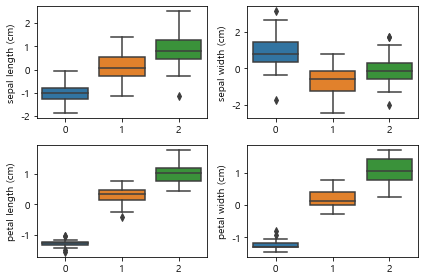

In [12]:
plt.subplot(2,2,1)
sns.boxplot(y, X_df['sepal length (cm)'])

plt.subplot(2,2,2)
sns.boxplot(y, X_df['sepal width (cm)'])

plt.subplot(2,2,3)
sns.boxplot(y, X_df['petal length (cm)'])

plt.subplot(2,2,4)
sns.boxplot(y, X_df['petal width (cm)'])

plt.tight_layout()
plt.show()

종 마다 feature 별로 특징이 두드러지나 sepal width의 경우에는 좀 애매합니다  
어떤 식으로 분포하고 있는 지 알아보기 위해 산점도를 이용해 시각화 해보겠습니다  
([이곳](http://theyoonicon.com/scikit-learn%EC%9D%98-iris-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/)을 참고하였습니다)


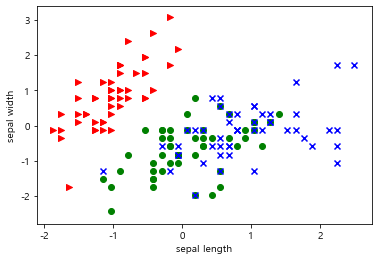

In [16]:
#종 별 sepal length / width에 따른 2차원 산점도 그리기
for target in range(3):
    if target == 0: #종이 setosa인 경우 red
        c='r'
        marker='>'
    elif target == 1: #종이 versicolor인 경우 green
        c='g'
        marker='o'
    elif target == 2: #종이 virginica인 경우 blue
        c='b'
        marker='x'

    plt.scatter(X[y == target, 0], # sepal length
                X[y == target, 1], # sepal width
                marker = marker, c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

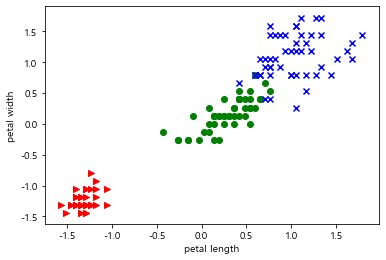

In [18]:
#종 별 petal length / width에 따른 2차원 산점도 그리기
for target in range(3):
    if target == 0: #종이 setosa인 경우 red
        c='r'
        marker='>'
    elif target == 1: #종이 versicolor인 경우 green
        c='g'
        marker='o'
    elif target == 2: #종이 virginica인 경우 blue
        c='b'
        marker='x'

    plt.scatter(X[y == target, 2], # petal length
                X[y == target, 3], # petal width
                marker = marker, c = c)
    plt.xlabel("petal length")
    plt.ylabel("petal width")

petal로는 육안으로 보아도 구분이 확실히 됩니다. 따라서 sepal, 즉 꽃받침의 너비가 요주의 변수겠네요

--------------------------------------------------------------------------------------
# 2. Modeling


## 2-1. KNN
KNN모델을 생성하고 train set을 fit 시켜봅시다

In [20]:
# Train, Test 셋 나누기 - 80대 20으로 나눔.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=77)

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [21]:
# build KNN model (k = 3) KNN 모델을 생성하고 하이퍼파라미터 k를 3으로 지정
knn = KNeighborsClassifier(n_neighbors = 3)

In [22]:
# train the model 생성한 KNN모델에 train 데이터 셋을 fit 시켜 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
# get the predict value(y_pred) from X_test #학습한 데이터를 바탕으로 X_test에 대한 예측값 y_pred생성
y_pred = knn.predict(X_test)

In [24]:
# X_test를 투입시켰을 때의 y_pred값과 y_test의 값을 비교하여 mean accurcy반환
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.8333333333333334


In [29]:
#k=5로 지정한 경우
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print('accuracy: ', knn2.score(X_test, y_test))

accuracy:  0.8666666666666667


k=5일 때의 accuracy 값이 더 높게 나왔다. 그렇다면 더 좋은 결과를 낼 수는 없을까?

### [참고] KNeighborsClassifier's options
1. n_neighbors = int (default = 5)
2. weights = str or callable (default = 'uniform')
3. metric = string or callable (default = 'minkowski')

따라서 이 결과는 
1. n_neighbors = 3 or 5
2. weights = uniform 
3. metric = minkowski 일 때의 score 값이라고 할 수 있다.

## 2-2 GridSearchCV
다양한 하이퍼파라미터의 조합으로 가장 좋은 score 값을 추출하고 보다 신뢰성있는 모델 평가를 위해 교차검증을 실시해보자!

1. 교차검증(k-fold-validation) : 모든 데이터 셋을 train에도 사용하고, validation set에도 사용함으로써 데이터의 수가 적은 경우나 데이터가 한쪽으로 쏠려 있는 경우에도 신뢰성 있는 모델 평가를 가능케 함.

2. Validation set : 학습 과정에서 여러 가지 하이퍼 파라미터들로 생성된 모델 중 어떤 것이 성능이 좋은지 평가할 때 소모되는 데이터 셋 *Test set과 헷갈리지 말 것


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid_params = {
    'n_neighbors' : [3, 5, 11, 15], #인접한 이웃 몇 개를 볼 것인지를 결정하는 하이퍼 파라미터 k의 개수를 각각 지정
    'weights' : ['uniform', 'distance'], #가중치 결정 방법
    'metric' : ['euclidean', 'manhattan'] #거리계산 방식
} #따라서 각 경우에 대해 최종 결과는 4 * 2 * 2 = 16가지의 형태로 나타날 것이다.

In [37]:
gs = GridSearchCV(
    KNeighborsClassifier(), #KNN을 이용
    grid_params, #위에서 설정한 파라미터를 인자로 전달
    verbose = 1, #?
    cv = 3, # 3-fold-cross-validation을 이용함.
    n_jobs = -1 #?
)

In [38]:
gs_results = gs.fit(X_train, y_train)
#train 데이터 셋에 fit 시킨 결과를 gs_results에 저장함.

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
print("Best Parameter: {}".format(gs.best_params_))
#가장 좋은 결과를 얻는 parameter는 이웃 수 (n_neighbors)가 11일 때, 
#거리 계산 방식(metric)이 유클리디안일 때, 
#가중치(weights)를 uniform 방식으로 주었을 때이다.

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [42]:
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))
#위의 파라미터를 이용해 계산한 최종 스코어는 0.992이다.

Best Cross-validity Score: 0.992


In [47]:
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))
#grid_search 알고리즘을 test_set에 적용시켜 나온 score값은 다음과 같다.
#위의 이웃수를 5로 지정해 주었을 때의 값과 별반 다를 것이 없다.더 좋은 결과를 어떻게 얻을까?

Test set Score: 0.867


[Score 값의 비교]
- Gridsearch의 score값은 별 다른 옵션을 지정해주지 않는 이상 estimator의 scoring 방식을 사용!
- 따라서 위에서 knn모델을 이용해 출력한 score 값과 gridsearch에서 출력한 score값은 그 산출 방식이 같다.

## 2-3 GridSearchCV :: N_Neighbors Tuning
위에서 교차검증으로 세 가지 하이퍼 파라미터를 튜닝해보았다면 이번에는 오로지 이웃의 개수인 n_neighbors만 세밀하게 조정해보자

In [48]:
#GridSearch의 범위를 1에서 10까지로 지정함
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [49]:
#KNN 알고리즘에 GridSearch를 적용함
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [50]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

다섯 번의 교차검증을 실시하는데, n_neighbors이외의 다른 파라미터값을 지정하지 않았기 때문에 default 값인 weights(uniform), metric(minkowski) 방식으로 계산된다. 이를 바탕으로 계산한 결과는 아래와 같다. 

In [51]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 1}


In [52]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.975


In [53]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.833


In [54]:
result_grid = pd.DataFrame(grid_search.cv_results_)
#결과를 데이터 프레임 형태로 저장

In [55]:
result_grid
#각 n_neighbors에 따른 다양한 score 값을 보여줌.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000591,0.000483,0.001596,7.981778e-04,1,{'n_neighbors': 1},0.961538,1.0,0.956522,0.956522,...,0.975000,0.020498,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000199,0.000399,0.001795,3.983749e-04,2,{'n_neighbors': 2},0.923077,1.0,0.956522,0.913043,...,0.958333,0.036845,6,0.989362,1.000000,1.000000,1.000000,1.000000,0.997872,0.004255
2,0.000200,0.000399,0.001197,3.989460e-04,3,{'n_neighbors': 3},0.923077,1.0,0.956522,1.000000,...,0.975000,0.031928,1,0.989362,0.989474,1.000000,0.989691,0.989691,0.991643,0.004180
3,0.000798,0.000399,0.001397,4.887723e-04,4,{'n_neighbors': 4},0.923077,1.0,0.913043,1.000000,...,0.958333,0.036845,6,0.989362,0.989474,1.000000,0.989691,0.979381,0.989582,0.006522
4,0.000798,0.000399,0.001197,3.980877e-04,5,{'n_neighbors': 5},0.884615,1.0,0.913043,1.000000,...,0.950000,0.046864,9,0.989362,0.978947,0.989691,0.979381,0.989691,0.985414,0.005106
5,0.000199,0.000399,0.001200,4.042626e-04,6,{'n_neighbors': 6},0.923077,1.0,0.956522,1.000000,...,0.966667,0.029926,3,0.989362,0.989474,1.000000,1.000000,0.979381,0.991643,0.007745
6,0.000399,0.000489,0.000798,3.989935e-04,7,{'n_neighbors': 7},0.884615,1.0,1.000000,1.000000,...,0.966667,0.046215,3,0.989362,1.000000,1.000000,0.989691,0.989691,0.993749,0.005106
7,0.000399,0.000489,0.000998,1.507891e-07,8,{'n_neighbors': 8},0.884615,1.0,1.000000,1.000000,...,0.966667,0.046215,3,0.989362,0.989474,0.989691,0.969072,0.979381,0.983396,0.008166
8,0.000798,0.000399,0.000399,4.886360e-04,9,{'n_neighbors': 9},0.923077,1.0,0.913043,1.000000,...,0.958333,0.036845,6,0.989362,1.000000,1.000000,0.989691,0.989691,0.993749,0.005106
9,0.000798,0.000399,0.000997,2.780415e-07,10,{'n_neighbors': 10},0.923077,1.0,0.956522,1.000000,...,0.950000,0.049043,9,0.978723,1.000000,0.989691,1.000000,0.979381,0.989559,0.009371


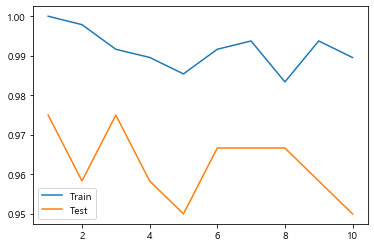

In [56]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

- 이웃 수에 따른 train / test set의 mean_score 그래프
- 이 그래프를 그리는 이유는 train / test 셋의 score를 같이 확인해봄으로써 모델이 over/under fitting 되진 않았는지 확인해보기 위해서다.
- Train 스코어가 항상 더 높은 score을 가지기 때문에 과적합 된 것은 아닌지 생각해 볼 필요가 있다.

# 3. Evaluation
지금까지 진행 한 분석의 결과를 정리하고, 더 좋은 Score 값을 찾는 파라미터의 조합을 연구해보자

[현재까지의 상황]
1. n_neighbors = 5 / weights = uniform / metric = minkowski  
{test set score : 0.86666667}

2. n_neighbors = 11 / weights = uniform / metric = euclidean  
{model score : 0.992  / test set score : 0.867}

3. n_nieghbors = 1 / weights = uniform / metric = minkowski  
{model score : 0.975  / test set score : 0.833}

==> 파라미터를 더 다양하게 지정해보자
metric의 경우 ([이곳](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)을 참고하였음)

In [114]:
grid_params = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 15, 17, 20], #이웃 수
    'weights' : ['uniform', 'distance'], #가중치 결정 방법
    'metric' : ['euclidean', 'manhattan', 'minkowski', 'chebyshev'] #거리계산 방식
} # 13 * 2 * 4 = 104개의 조합이 생성된다.

In [130]:
grid_tn = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

In [131]:
grid_tn.fit(X_train, y_train)

Fitting 3 folds for each of 104 candidates, totalling 312 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 out of 312 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 15,
                                         17, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [132]:
print("Best Parameter: {}".format(grid_tn.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_tn.best_score_))
print("Test set Score: {:.3f}".format(grid_tn.score(X_test, y_test)))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best Cross-validity Score: 1.000
Test set Score: 0.900


## 결론
여러 번의 시도 끝에 찾은 best score는 0.900이었으며 이때의 model score는 1이었다.  
train set에서의 모델 스코어가 1이기 때문에 과적합을 우려할 수 있으나 다행히 test set score도 더 높게 나왔다.

처음 cv값이 5였을 때에는 아무리해도 위에서 진행했던 score 값보다 낮게 나왔으나
cv를 3으로 지정한 후에 겨우 더 높은 값을 찾을 수 있었다.
하이퍼 파라미터를 튜닝할 때 이웃 수, 거리계산방식, 가중치계산방식만 고려했었는데 교차검증에 이용되는 fold 값 또한 영향을 줄 수 있다는 사실을 알게 되었다.

그래도 마지막에는 더 좋은 값을 찾아서 다행이다.  
이후로도 여러 번 조정해가면서 해보았지만 저 스코어 이상의 값을 찾을 수 없었다  
만약 있다면.. 어떤 조합인지 알고싶다...

